### <font color='#00d2d3'> Importer les packages

In [1]:
# Importer les packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords') # Télécharger le package stopwords
nltk.download('wordnet')
from nltk.corpus import stopwords # Importer le package stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### <font color='#00d2d3'> Importer et lire les données

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importer les données
df=pd.read_csv('/content/drive/MyDrive/Future_Intern/IMDB Dataset.csv')
# Afficher les données
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

- 1 : Negative
- 0 : Positive

In [5]:
# Dimension des données


### <font color='#00d2d3'> Pré-traitement des données

In [6]:
# Nombre d'observations dans chaque classe
df.sentiment.value_counts()

,count
sentiment,
positive,25000
negative,25000


#### <font color='#00d2d3'> Pré-traitement des données textuelles

In [7]:
# Afficher la première ligne de la colonne text
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [8]:
# Afficher la deuxième ligne de la colonne text
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

###### <font color='#1dd1a1'> Commencer le nettoyage des tweets


In [9]:
# Fonction supprimant les links
def remove_links(review):

  review=re.sub(r'http[s]*:?//\S+','',review)
  return review


In [10]:
# # Exemple
# tweet ='The urls of my webpages is http://abdoulwahab.com https://abdoul.com'
# tweet = remove_links(tweet)
# tweet

In [11]:
# Fonction supprimant les @username
def remove_users(review):
  review=re.sub(r'@[\w\-\._]+','',review)

  return review


In [12]:
# Exemple
review ='My username is @abdwahdia'
review = remove_users(review)
review

'My username is '

In [13]:
# Supprimer les adresses emails
def email_address(text):
  review=re.sub(r'[\w\-\.]+@[\w\-.]+','',text)
  return review

In [14]:
# Exemple
tweet ='My email adress is the following : abdoulwahabdiall@gmail.com'
tweet = email_address(tweet)
tweet

'My email adress is the following : '

In [15]:
!pip install contractions

In [16]:
import contractions
# Fonction étendant les contractions
def contraction(review):
    expanded_all = []
    for word in review.split():
        expanded_all.append(contractions.fix(word)) # utiliser la fonction fix de contractions

    expand = ' '.join(expanded_all)
    return expand

In [17]:
# Exemple
review ="That's the right thing to do"
review = contraction(review)
review

'That is the right thing to do'

In [18]:
# Supprimer html caractères
def clean_html(text):
  review=re.sub(r'&\w+','',text)
  return review

In [19]:
# Exemple
review ='#world What a shame &amp'
review = clean_html(review)
review

'#world What a shame '

In [20]:
# Remplacer tout ce qui n'est chaines de caractères alphabétiques et espace par ' '
def alpha_b(text):
  review=re.sub(r'[^a-zA-Z\s]+','',text)
  return review

In [21]:
# Exemple
review = 'My year of birth is 2050 #happy'
review = alpha_b(review)
review

'My year of birth is  happy'

In [22]:
# Fonction remplaçant les espaces multiples et convertissant majuscules en minuscules
def lower(text):
  review=re.sub(r'\s{2,}',' ',text)
  return review.lower()




In [23]:
text=' allain loe '

In [24]:
# Supprimer les espaces en début et fin de tweet
def clean_space(text):
  review=re.sub(r'^\s|\s$','',text)
  return review


In [25]:
# Fonction supprimant les stopwords
def remove_stopwords(text):


  Stopwords = stopwords.words('english')
  review= ' '.join([word for word in text.split() if word not in Stopwords])
  return review

In [26]:
# Exemple
review= 'Life is a mess for some people'
review = remove_stopwords(review)
review

'Life mess people'

In [27]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
def lem_sw(text):
    review = [lemma.lemmatize(word) for word in text.split()]
    review = " ".join(review)
    return review

###### <font color='#1dd1a1'> Appliquer les différentes fonctions sur les tweets



In [28]:
from os import EX_TEMPFAIL
# Appliquer la fonction remove_users
df['new_review']=df.review.apply(func=remove_users)
# Appliquer la fonction remove_links
df['new_review']=df.new_review.apply(func=remove_links)
# Appliquer la fonction email_address
df['new_review']=df.new_review.apply(func=email_address)
# Appliquer la fonction remove_contraction
df['new_review']=df.new_review.apply(func=contraction)
# Appliquer la fonction clean_html
df['new_review']=df.new_review.apply(func=clean_html)
# Appliquer la fonction alpha_b
df['new_review']=df.new_review.apply(func=alpha_b)
# Appliquer la fonction lower
df['new_review']=df.new_review.apply(func=lower)
# Appliquer la fonction clean_space
df['new_review']=df.new_review.apply(func= clean_space)
# Appliquer la fonction remove_stopwords
df['new_review']=df.new_review.apply(func=remove_stopwords)
# Appliquer la fonction lem_sw
df['new_review']=df.new_review.apply(func= lem_sw)

In [29]:
# Afficher df
df.head(10)

,review,sentiment,new_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...
...,...,...,...
495,"""American Nightmare"" is officially tied, in my...",negative,american nightmare officially tied opinion pat...
496,"First off, I have to say that I loved the book...",negative,first say loved book animal farm read th grade...
497,This movie was extremely boring. I only laughe...,negative,movie extremely boring laughed time decided re...
498,I was disgusted by this movie. No it wasn't be...,negative,disgusted movie graphic sex scene ruined image...


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [32]:
# Encode the sentiment column
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])  # positive -> 1, negative -> 0


### <font color='#00d2d3'> Vectorisation

In [33]:
# Parameters for tokenization and padding
vocab_size = 10000  # Maximum number of unique words to keep
max_length = 200  # Maximum length of sequences
embedding_dim = 100  # Dimension of embedding vectors

# Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df['new_review'])

# Convert reviews to sequences
X = tokenizer.texts_to_sequences(df['new_review'])

# Pad sequences
X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post')

# Extract target labels
y = df['sentiment'].values


In [34]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [35]:
# Build the LSTM model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(128, return_sequences=False)))

# Dropout layer
model.add(Dropout(0.4))

# Dense output layer with sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [36]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=64,
    verbose=1
)


Epoch 1/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 582s 1s/step - accuracy: 0.7181 - loss: 0.5298 - val_accuracy: 0.8627 - val_loss: 0.3523
Epoch 2/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 600s 1s/step - accuracy: 0.8869 - loss: 0.2905 - val_accuracy: 0.8789 - val_loss: 0.3181
Epoch 3/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 576s 1s/step - accuracy: 0.9193 - loss: 0.2183 - val_accuracy: 0.8771 - val_loss: 0.3078
Epoch 4/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 614s 1s/step - accuracy: 0.9361 - loss: 0.1772 - val_accuracy: 0.8425 - val_loss: 0.3876
Epoch 5/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 554s 1s/step - accuracy: 0.9404 - loss: 0.1656 - val_accuracy: 0.8648 - val_loss: 0.3685


In [37]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

235/235 ━━━━━━━━━━━━━━━━━━━━ 49s 207ms/step - accuracy: 0.8658 - loss: 0.3654
Test Accuracy: 86.64%


In [38]:
# Predict sentiments for the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Decode predictions back to text labels
y_pred_labels = label_encoder.inverse_transform(y_pred.flatten())
print(y_pred_labels[:10])  # Display the first 10 predictions

235/235 ━━━━━━━━━━━━━━━━━━━━ 48s 200ms/step
['negative' 'negative' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'negative']


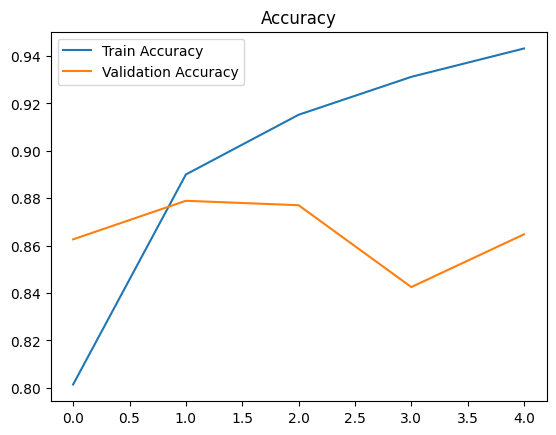

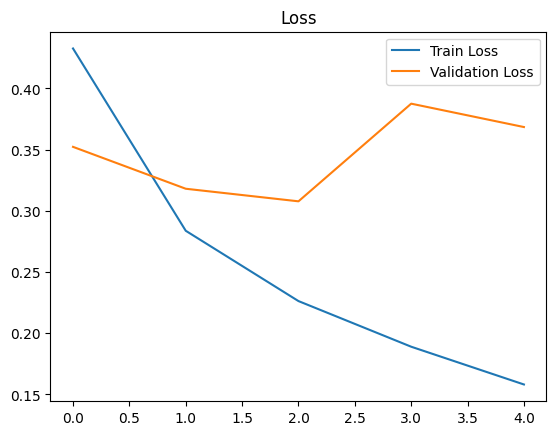

In [39]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()